# Benchmark TenSEAL

In [ ]:
from time import time 
import random as rand
import numpy as np
import tenseal as ts
import matplotlib.pyplot as plt

rand.seed(777)
mean_soma_bfv = []
mean_prod_bfv = []

Instanciação do ContextTenSEAL, objeto de configuração dos hiperparâmetros para a criptografia dos vetores

*poly_modulus_degree*:	Define o espaço de operação (quanto maior, mais segurança e espaço para ruído)

*plain_modulus*:	Controla o tamanho dos inteiros codificados

In [2]:
context = ts.context(
                ts.SCHEME_TYPE.BFV, 
                poly_modulus_degree=8192,
                plain_modulus=1032193)

## Caso de teste com Soma entre dois vetores criptografados

In [3]:
duration_bfv = []
duration_comm = []
sizes = [100, 1000, 10000, 100000, 1000000, 10000000]
for size in sizes:
    L = [rand.randint(0,100000) for _ in range(size)]
    aux = [rand.randint(0,100000) for _ in range(size)]
    t_start = time()
    encv = ts.bfv_vector(context, L)
    result = encv + aux
    t_end = time()
    duration_bfv.append((t_end - t_start) * 1000)
    print("*BFV c2p {} sum time*: {:.2f} ms".format(size, duration_bfv[-1]))
    t_start = time()
    S = np.array(L) + np.array(aux)
    t_end = time()
    duration_comm.append((t_end - t_start) * 1000)
    print("**Commom {} sum time*: {:.2f} ms".format(size, duration_comm[-1]))
    z = result.decrypt()
    print("Are Equal?", sum(z) == sum(S))
    

*BFV c2p 100 sum time*: 11.86 ms
**Commom 100 sum time*: 0.00 ms
Are Equal? True
*BFV c2p 1000 sum time*: 11.04 ms
**Commom 1000 sum time*: 0.00 ms
Are Equal? True
The following operations are disabled in this setup: matmul, matmul_plain, conv2d_im2col, replicate_first_slot.
If you need to use those operations, try increasing the poly_modulus parameter, to fit your input.
*BFV c2p 10000 sum time*: 30.53 ms
**Commom 10000 sum time*: 0.65 ms
Are Equal? True
The following operations are disabled in this setup: matmul, matmul_plain, conv2d_im2col, replicate_first_slot.
If you need to use those operations, try increasing the poly_modulus parameter, to fit your input.
*BFV c2p 100000 sum time*: 185.57 ms
**Commom 100000 sum time*: 14.92 ms
Are Equal? True
The following operations are disabled in this setup: matmul, matmul_plain, conv2d_im2col, replicate_first_slot.
If you need to use those operations, try increasing the poly_modulus parameter, to fit your input.
*BFV c2p 1000000 sum time*: 2

[]

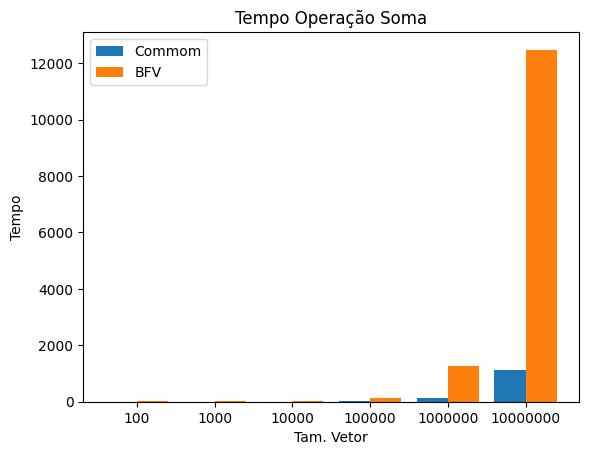

In [ ]:
w, x = 0.4, np.arange(len(sizes))

fig, ax = plt.subplots()
ax.bar(x - w/2, duration_comm, width=w, label='Commom')
ax.bar(x + w/2, duration_bfv, width=w, label='BFV')

ax.set_xticks(x)
ax.set_xticklabels(sizes)
ax.set_ylabel('Tempo')
ax.set_xlabel('Tam. Vetor')
ax.set_title('Tempo Operação Soma')
ax.legend()

ax.plot()

In [5]:
duration_bfv = []
duration_comm = []
sizes = [100, 1000, 10000, 100000, 1000000, 10000000]
for size in sizes:
    
    L = [rand.randint(0,100) for _ in range(size)]
    aux = [rand.randint(0,100) for _ in range(size)]
    #aux = [1 for _ in range(size)]
    #context.generate_galois_keys()
    #context.global_scale = 2**40
    t_start = time()
    #context.generate_relin_keys()
    encv = ts.bfv_vector(context, L)
    result = encv * aux
    t_end = time()
    duration_bfv.append((t_end - t_start) * 1000)
    print("*BFV c2p {} mult time*: {:.2f} ms".format(size, duration_bfv[-1]))
    t_start = time()
    S = np.array(L) * np.array(aux)
    t_end = time()
    duration_comm.append((t_end - t_start) * 1000)
    print("**Commom {} sum time*: {:.2f} ms".format(size, duration_comm[-1]))
    z = result.decrypt()
    print("Are Equal?", sum(z) == sum(S))
    

*BFV c2p 100 mult time*: 17.86 ms
**Commom 100 sum time*: 14.64 ms
Are Equal? True
*BFV c2p 1000 mult time*: 15.78 ms
**Commom 1000 sum time*: 1.00 ms
Are Equal? True
The following operations are disabled in this setup: matmul, matmul_plain, conv2d_im2col, replicate_first_slot.
If you need to use those operations, try increasing the poly_modulus parameter, to fit your input.
*BFV c2p 10000 mult time*: 29.91 ms
**Commom 10000 sum time*: 2.00 ms
Are Equal? True
The following operations are disabled in this setup: matmul, matmul_plain, conv2d_im2col, replicate_first_slot.
If you need to use those operations, try increasing the poly_modulus parameter, to fit your input.
*BFV c2p 100000 mult time*: 147.38 ms
**Commom 100000 sum time*: 20.19 ms
Are Equal? True
The following operations are disabled in this setup: matmul, matmul_plain, conv2d_im2col, replicate_first_slot.
If you need to use those operations, try increasing the poly_modulus parameter, to fit your input.
*BFV c2p 1000000 mult ti

[]

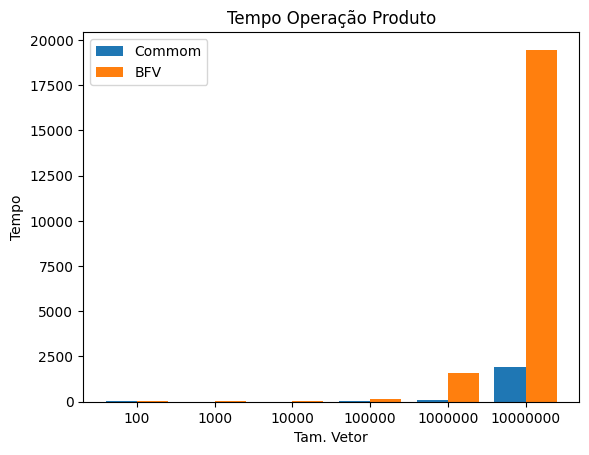

In [6]:
w, x = 0.4, np.arange(len(sizes))

fig, ax = plt.subplots()
ax.bar(x - w/2, duration_comm, width=w, label='Commom')
ax.bar(x + w/2, duration_bfv, width=w, label='BFV')

ax.set_xticks(x)
ax.set_xticklabels(sizes)
ax.set_ylabel('Tempo')
ax.set_xlabel('Tam. Vetor')
ax.set_title('Tempo Operação Produto')
ax.legend()

ax.plot()

## Casos de teste variando o grau do polinômio

In [ ]:
for s in [2048, 4096, 8192]:
    context = ts.context(
                ts.SCHEME_TYPE.BFV, 
                poly_modulus_degree=s,
                plain_modulus=1032193)
    duration_bfv = []
    duration_comm = []
    sizes = [100, 1000, 10000, 100000, 1000000, 10000000]
    for size in sizes:
        L = [rand.randint(0,100000) for _ in range(size)]
        aux = [rand.randint(0,100000) for _ in range(size)]
        t_start = time()
        encv = ts.bfv_vector(context, L)
        result = encv + aux
        t_end = time()
        duration_bfv.append((t_end - t_start) * 1000)
        print("*BFV c2p {} sum time*: {:.2f} ms".format(size, duration_bfv[-1]))
        t_start = time()
        S = np.array(L) + np.array(aux)
        t_end = time()
        duration_comm.append((t_end - t_start) * 1000)
        print("**Commom {} sum time*: {:.2f} ms".format(size, duration_comm[-1]))
        z = result.decrypt()
        print("Are Equal?", sum(z) == sum(S))
    
    mean_soma_bfv.append(sum(duration_bfv)/float(len(duration_bfv)))
    
    duration_bfv = []
    duration_comm = []
    for size in sizes:
        L = [rand.randint(0,100) for _ in range(size)]
        aux = [rand.randint(0,100) for _ in range(size)]
        t_start = time()
        encv = ts.bfv_vector(context, L)
        result = encv * aux
        t_end = time()
        duration_bfv.append((t_end - t_start) * 1000)
        print("*BFV c2p {} mult time*: {:.2f} ms".format(size, duration_bfv[-1]))
        t_start = time()
        S = np.array(L) * np.array(aux)
        t_end = time()
        duration_comm.append((t_end - t_start) * 1000)
        print("**Commom {} sum time*: {:.2f} ms".format(size, duration_comm[-1]))
        z = result.decrypt()
        print("Are Equal?", sum(z) == sum(S))
    mean_prod_bfv.append(sum(duration_bfv)/float(len(duration_bfv)))
    

In [ ]:
mean_soma_bfv

[3084.477663040161, 2941.104809443156, 2321.3897546132407]

In [18]:
mean_soma_bfv

[3084.477663040161, 2941.104809443156, 2321.3897546132407]

[]

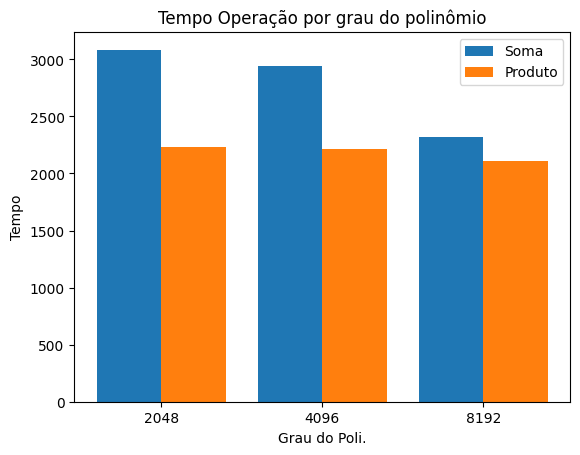

In [19]:
w, x = 0.4, np.arange(len([2048, 4096, 8192]))

fig, ax = plt.subplots()
ax.bar(x - w/2, mean_soma_bfv, width=w, label='Soma')
ax.bar(x + w/2, mean_prod_bfv, width=w, label='Produto')

ax.set_xticks(x)
ax.set_xticklabels([2048, 4096, 8192])
ax.set_ylabel('Tempo')
ax.set_xlabel('Grau do Poli.')
ax.set_title('Tempo Operação por grau do polinômio')
ax.legend()

ax.plot()